In [21]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver

In [22]:
load_dotenv()


True

In [23]:
llm = ChatOpenAI()

In [24]:
class JokeState(TypedDict):
    topic : str
    joke : str
    expalnation : str

In [25]:
def generate_joke(state:JokeState):
    prompt = f'Genrate a joke on the topic {state['topic']}'
    response = llm.invoke(prompt).content
    return {'joke':response}

In [26]:
def generate_expalanation(state:JokeState):
    prompt = f"Write an explanation for the joke - {state['joke']}"
    response = llm.invoke(prompt).content
    return {'explanation':response}

In [27]:
graph = StateGraph(JokeState)

graph.add_node('generate_joke',generate_joke)
graph.add_node('generate_expalanation',generate_expalanation)

graph.add_edge(START,'generate_joke')
graph.add_edge('generate_joke','generate_expalanation')
graph.add_edge('generate_expalanation',END)

checkpointer = InMemorySaver()

workflow = graph.compile(checkpointer=checkpointer)

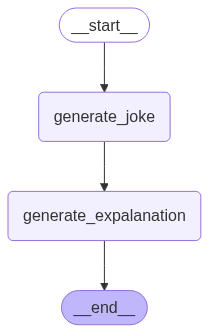

In [28]:
workflow

In [ ]:
config1 = {"configurable":{'thread_id':1}}
workflow.invoke({'topic':'pizza'},config=config1)

In [30]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'pizza'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f06e946-0307-683c-8000-5fd3e404777e'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2025-08-01T04:59:59.648915+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f06e946-02ff-6ead-bfff-ce7d61e96d20'}}, tasks=(PregelTask(id='8893e285-3890-6a2a-71ee-1b75d8959dab', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error='AuthenticationError("Error code: 401 - {\'error\': {\'message\': \'Incorrect API key provided: sk-proj-****************************************************************************************************************************************************tc_k. You can find your API key at https://platform.openai.com/account/api-keys.\', \'type\': \'invalid_request_error\', \'param\': None, \'code\': \'invalid_api_key\'}}")', interrupts=(), state=No

In [31]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f06e946-0307-683c-8000-5fd3e404777e'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2025-08-01T04:59:59.648915+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f06e946-02ff-6ead-bfff-ce7d61e96d20'}}, tasks=(PregelTask(id='8893e285-3890-6a2a-71ee-1b75d8959dab', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error='AuthenticationError("Error code: 401 - {\'error\': {\'message\': \'Incorrect API key provided: sk-proj-****************************************************************************************************************************************************tc_k. You can find your API key at https://platform.openai.com/account/api-keys.\', \'type\': \'invalid_request_error\', \'param\': None, \'code\': \'invalid_api_key\'}}")', interrupts=(), state=N

In [ ]:
config2 = {'configurable' : {'thread_id':2}}
workflow.invoke({'topic':'pasta'},config=config2)

In [33]:
workflow.get_state(config2)

StateSnapshot(values={'topic': 'pasta'}, next=('generate_joke',), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f06e94c-3818-6e0b-8000-582ac709d9f1'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2025-08-01T05:02:46.274804+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f06e94c-3816-66b1-bfff-32ff1acad443'}}, tasks=(PregelTask(id='398d5b6d-ea9c-827c-04d6-31033c20e23a', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error='AuthenticationError("Error code: 401 - {\'error\': {\'message\': \'Incorrect API key provided: sk-proj-****************************************************************************************************************************************************tc_k. You can find your API key at https://platform.openai.com/account/api-keys.\', \'type\': \'invalid_request_error\', \'param\': None, \'code\': \'invalid_api_key\'}}")', interrupts=(), state=No

In [34]:

list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f06e946-0307-683c-8000-5fd3e404777e'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2025-08-01T04:59:59.648915+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f06e946-02ff-6ead-bfff-ce7d61e96d20'}}, tasks=(PregelTask(id='8893e285-3890-6a2a-71ee-1b75d8959dab', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error='AuthenticationError("Error code: 401 - {\'error\': {\'message\': \'Incorrect API key provided: sk-proj-****************************************************************************************************************************************************tc_k. You can find your API key at https://platform.openai.com/account/api-keys.\', \'type\': \'invalid_request_error\', \'param\': None, \'code\': \'invalid_api_key\'}}")', interrupts=(), state=N

Time Travel

In [35]:
workflow.get_state({'configurable':{'thread_id':"1",'checkpointer_id':"1f06e946-02ff-6ead-bfff-ce7d61e96d20"}})

StateSnapshot(values={'topic': 'pizza'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f06e946-0307-683c-8000-5fd3e404777e'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2025-08-01T04:59:59.648915+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f06e946-02ff-6ead-bfff-ce7d61e96d20'}}, tasks=(PregelTask(id='8893e285-3890-6a2a-71ee-1b75d8959dab', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error='AuthenticationError("Error code: 401 - {\'error\': {\'message\': \'Incorrect API key provided: sk-proj-****************************************************************************************************************************************************tc_k. You can find your API key at https://platform.openai.com/account/api-keys.\', \'type\': \'invalid_request_error\', \'param\': None, \'code\': \'invalid_api_key\'}}")', interrupts=(), state=No

In [ ]:

workflow.invoke(None, {"configurable": {"thread_id": "1", "checkpoint_id": "1f06e946-02ff-6ead-bfff-ce7d61e96d205"}})

In [38]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f06e946-0307-683c-8000-5fd3e404777e'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2025-08-01T04:59:59.648915+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f06e946-02ff-6ead-bfff-ce7d61e96d20'}}, tasks=(PregelTask(id='8893e285-3890-6a2a-71ee-1b75d8959dab', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error='AuthenticationError("Error code: 401 - {\'error\': {\'message\': \'Incorrect API key provided: sk-proj-****************************************************************************************************************************************************tc_k. You can find your API key at https://platform.openai.com/account/api-keys.\', \'type\': \'invalid_request_error\', \'param\': None, \'code\': \'invalid_api_key\'}}")', interrupts=(), state=N

Updating State

In [41]:

workflow.update_state({"configurable": {"thread_id": "1", "checkpoint_id": "1f06e946-02ff-6ead-bfff-ce7d61e96d205", "checkpoint_ns": ""}}, {'topic':'samosa'})

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f06e95a-08e5-6b14-8000-4688c61991a7'}}

In [42]:

list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'samosa'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f06e95a-08e5-6b14-8000-4688c61991a7'}}, metadata={'source': 'update', 'step': 0, 'parents': {}}, created_at='2025-08-01T05:08:57.135177+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f06e946-02ff-6ead-bfff-ce7d61e96d205'}}, tasks=(PregelTask(id='a98c3e5e-95b9-6b5a-d490-e2c363face18', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'topic': 'samosa'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f06e959-0b6e-652f-8000-3c32c78cfb4a'}}, metadata={'source': 'update', 'step': 0, 'parents': {}}, created_at='2025-08-01T05:08:30.557309+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_i

In [ ]:

workflow.invoke(None, {"configurable": {"thread_id": "1", "checkpoint_id": "1f06e946-02ff-6ead-bfff-ce7d61e96d205"}})

Fault Tolerance

In [44]:
from langgraph.graph import StateGraph,START,END
from langgraph.checkpoint.memory import InMemorySaver
from typing import TypedDict
import time

In [45]:
# 1.Define the state
class CrashState(TypedDict):
    input : str
    step1 : str
    step2 : str

In [46]:
# 2. Define steps 
def step1(state:CrashState)->CrashState:
    print("Step 1 Executed")
    return {"step1":'Done','input':state['input']}

def step2(state:CrashState)->CrashState:
    print("Step 2 hanging... now manually interrupt from the notebook toolbar (stop button)")
    time.sleep(10)
    return {'step2':'Done'}

def step3(state:CrashState)->CrashState:
    print("Step 3 executed")
    return {"Done":True}

In [47]:
# Build the graph 
builder = StateGraph(CrashState)

builder.add_node('step1',step1)
builder.add_node('step2',step2)
builder.add_node('step3',step3)

builder.set_entry_point('step1')
builder.add_edge("step1","step2")
builder.add_edge('step2','step3')
builder.add_edge('step3',END)

checkpointer = InMemorySaver()
graph = builder.compile(checkpointer=checkpointer)

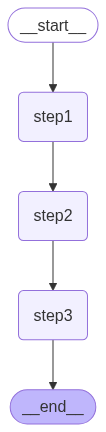

In [48]:
graph

In [49]:

try:
    print("▶️ Running graph: Please manually interrupt during Step 2...")
    graph.invoke({"input": "start"}, config={"configurable": {"thread_id": 'thread-1'}})
except KeyboardInterrupt:
    print("❌ Kernel manually interrupted (crash simulated).")

▶️ Running graph: Please manually interrupt during Step 2...
Step 1 Executed
Step 2 hanging... now manually interrupt from the notebook toolbar (stop button)
❌ Kernel manually interrupted (crash simulated).


In [50]:

# 6. Re-run to show fault-tolerant resume
print("\n🔁 Re-running the graph to demonstrate fault tolerance...")
final_state = graph.invoke(None, config={"configurable": {"thread_id": 'thread-1'}})
print("\n✅ Final State:", final_state)


🔁 Re-running the graph to demonstrate fault tolerance...
Step 2 hanging... now manually interrupt from the notebook toolbar (stop button)
Step 3 executed

✅ Final State: {'input': 'start', 'step1': 'Done', 'step2': 'Done'}


In [51]:
list(graph.get_state_history({"configurable": {"thread_id": 'thread-1'}}))

[StateSnapshot(values={'input': 'start', 'step1': 'Done', 'step2': 'Done'}, next=(), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f06e972-c47f-61ac-8003-6a98b03adcd7'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}}, created_at='2025-08-01T05:20:01.051478+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f06e972-c47e-6104-8002-430219701df9'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'input': 'start', 'step1': 'Done', 'step2': 'Done'}, next=('step3',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f06e972-c47e-6104-8002-430219701df9'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-08-01T05:20:01.051046+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f06e971-ab9b-6e15-8001-0a2e5ec42542'}}, tasks=(PregelTask(id='7a98427f-2d37-081a-a8c1-f773925e1333